# Glass type prediction using Decision tree & Boosting techniques

In [40]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [41]:
ls

 Volume in drive E is New Volume
 Volume Serial Number is DE45-1ABD

 Directory of E:\Data science\Python bootcamp\Refactored_Py_DS_ML_Bootcamp-master\General practise\Glass prediction

21-Jun-Tue  07:52    <DIR>          .
21-Jun-Tue  07:52    <DIR>          ..
21-Jun-Tue  06:38    <DIR>          .ipynb_checkpoints
21-Jun-Tue  06:22            11,903 glass.data
21-Jun-Tue  06:24             3,506 glass.names
21-Jun-Tue  07:03            10,812 Glass_data.csv
21-Jun-Tue  07:52            39,649 Glass_pred.ipynb
               4 File(s)         65,870 bytes
               3 Dir(s)  141,782,753,280 bytes free


In [42]:
glass = pd.read_csv('Glass_data.csv')

In [43]:
glass.head(3)

,S.No,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [44]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   S.No        214 non-null    int64  
 1   RI          214 non-null    float64
 2   Na          214 non-null    float64
 3   Mg          214 non-null    float64
 4   Al          214 non-null    float64
 5   Si          214 non-null    float64
 6   K           214 non-null    float64
 7   Ca          214 non-null    float64
 8   Ba          214 non-null    float64
 9   Fe          214 non-null    float64
 10  Glass_type  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [46]:
glass.drop(columns=['S.No'], axis=1, inplace =True)

In [47]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [48]:
glass['Glass_type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

<AxesSubplot:xlabel='Glass_type', ylabel='count'>

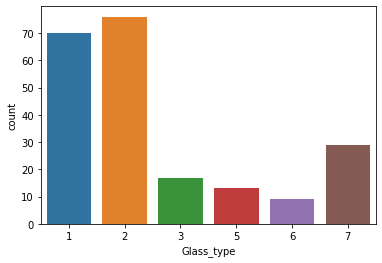

In [49]:
sns.countplot(x='Glass_type', data=glass)

-- 1 build_win_fp
-- 2 build_win_nfp
-- 3 veh_win_fp
-- 4 veh_win_nfp 
-- 5 containers
-- 6 tableware
-- 7 headlamps

In [50]:
glass['Glass_type'] = glass['Glass_type'].map({1: 'build_win_fp',2: 'build_win_nfp',3: 'veh_win_fp',4: 'veh_win_nfp',
                                               5: 'containers',6: 'tableware',7: 'headlamps'})

<AxesSubplot:xlabel='Glass_type', ylabel='count'>

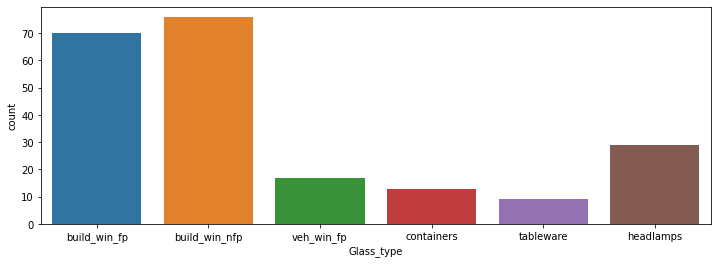

In [51]:
plt.figure(figsize=(12,4))
sns.countplot(x='Glass_type', data=glass)

In [52]:
type(glass['Glass_type'][0])

str

<AxesSubplot:>

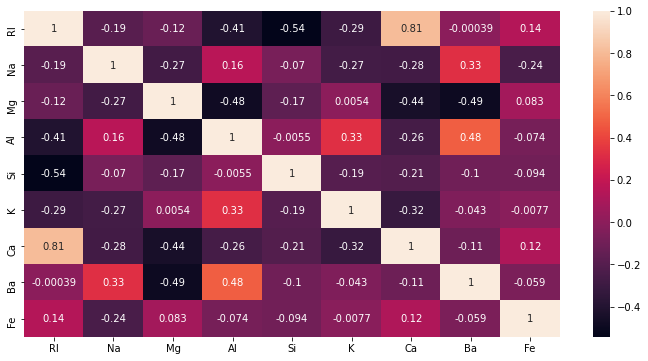

In [56]:
plt.figure(figsize=(12,6))
sns.heatmap(glass.corr(), annot=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


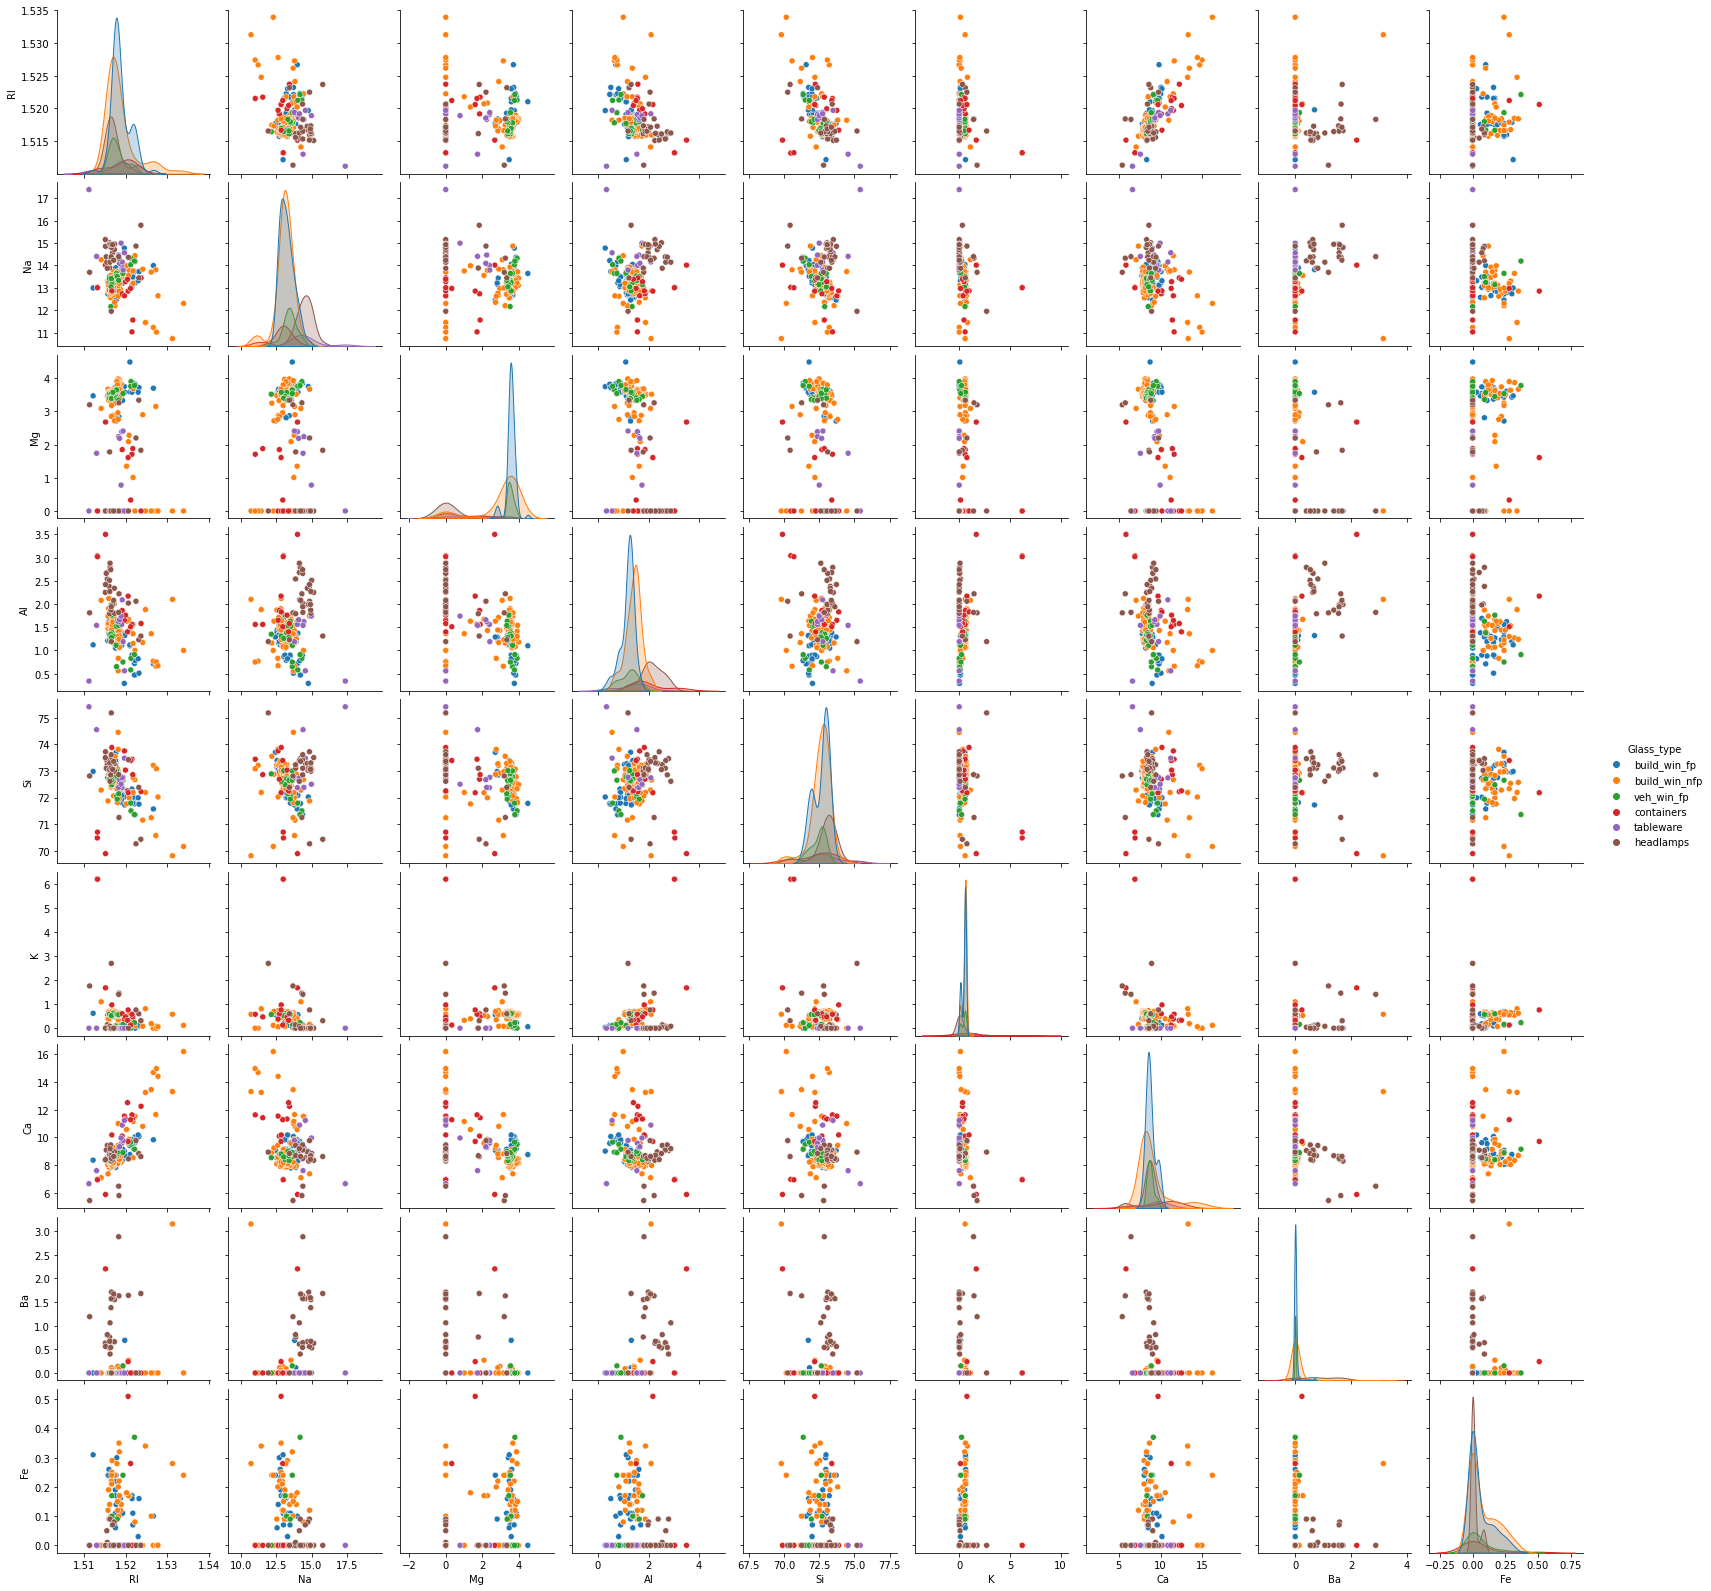

In [57]:
sns.pairplot(glass,hue='Glass_type')

In [60]:
glass_red = pd.concat([glass[glass['Glass_type']=='build_win_fp'],glass[glass['Glass_type']=='build_win_nfp']])      

In [61]:
glass_red.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,build_win_fp
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,build_win_fp
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,build_win_fp


<AxesSubplot:xlabel='Glass_type', ylabel='count'>

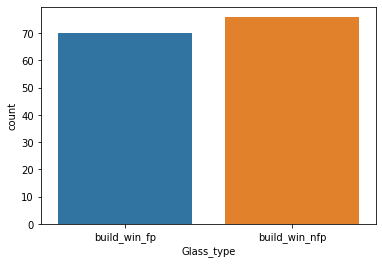

In [63]:
sns.countplot(x='Glass_type', data=glass_red)

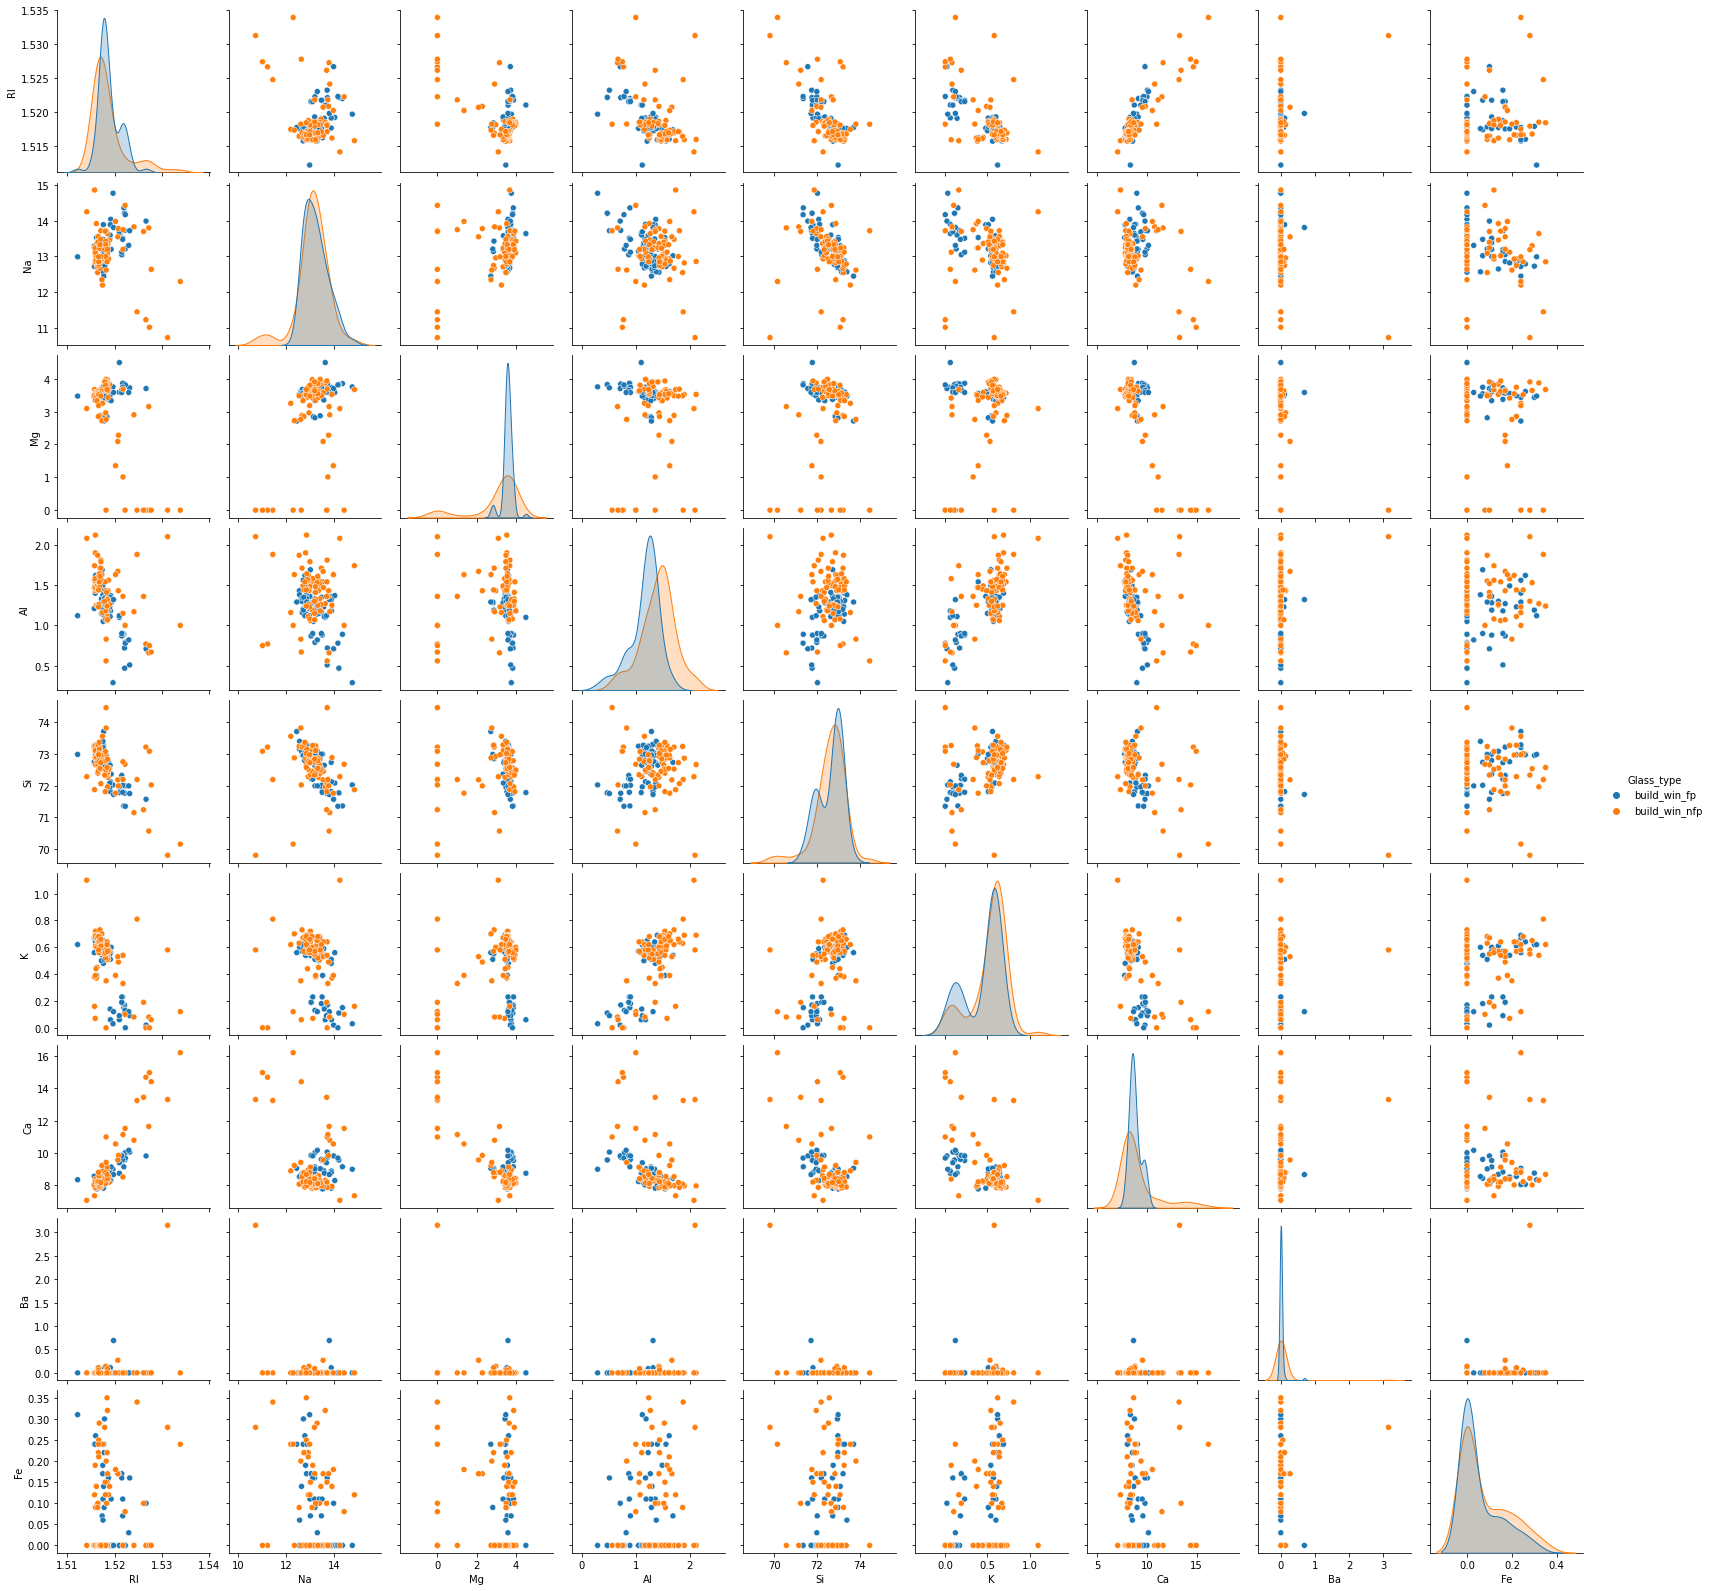

In [64]:
sns.pairplot(glass_red,hue='Glass_type')

<AxesSubplot:xlabel='Glass_type', ylabel='RI'>

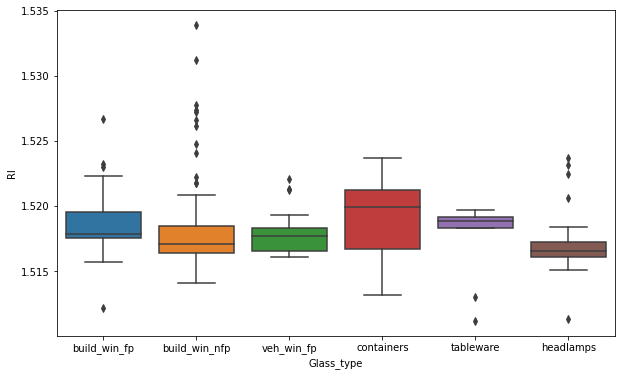

In [66]:
plt.figure(figsize=(10,6))
sns.boxplot(y='RI',x='Glass_type',data=glass)

Target classifiers: KNN, Logistic, Decision trees, bagging, Random Forest, Adaboost, Gradient boost

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
glass.drop('Glass_type',axis=1)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [69]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(glass.drop('Glass_type',axis=1), glass['Glass_type'], test_size=0.2, random_state=101)

In [70]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(glass_red.drop('Glass_type',axis=1), glass_red['Glass_type'], test_size=0.2, random_state=101)

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier()

In [73]:
dt1.fit(X_train1,y_train1)

DecisionTreeClassifier()

In [74]:
dt2.fit(X_train2,y_train2)

DecisionTreeClassifier()

In [75]:
dt1_pred = dt1.predict(X_test1)

In [76]:
dt2_pred = dt2.predict(X_test2)

In [77]:
from sklearn.metrics import classification_report, confusion_matrix

# Fitting a single decision tree considering all classification type

In [78]:
print(classification_report(dt1_pred,y_test1))

               precision    recall  f1-score   support

 build_win_fp       0.72      0.68      0.70        19
build_win_nfp       0.70      0.50      0.58        14
   containers       0.50      1.00      0.67         2
    headlamps       0.67      0.50      0.57         4
    tableware       0.50      1.00      0.67         1
   veh_win_fp       0.17      0.33      0.22         3

     accuracy                           0.60        43
    macro avg       0.54      0.67      0.57        43
 weighted avg       0.66      0.60      0.62        43



# Fitting a single decision tree considering top 2 classification type

In [79]:
print(classification_report(dt2_pred, y_test2))
print(confusion_matrix(dt2_pred, y_test2))

               precision    recall  f1-score   support

 build_win_fp       0.92      0.86      0.89        14
build_win_nfp       0.88      0.94      0.91        16

     accuracy                           0.90        30
    macro avg       0.90      0.90      0.90        30
 weighted avg       0.90      0.90      0.90        30

[[12  2]
 [ 1 15]]


In [178]:
cvscore_glass_red = cross_val_score(estimator=DecisionTreeClassifier(),X=glass_red.drop('Glass_type', axis=1),
                                    y=glass_red['Glass_type'], scoring='accuracy', 
                                    cv=RepeatedStratifiedKFold(n_splits=6, n_repeats=10))

In [179]:
print('CV_score_glass_red: %.3f (%.3f)' % (np.mean(cvscore_glass_red), np.std(cvscore_glass_red)))

CV_score_glass_red: 0.766 (0.077)


# Adaboost classifier considering all classification type

In [167]:
from sklearn.ensemble import AdaBoostClassifier
from numpy import mean, std
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [102]:
adab1 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5))
    
grid1 = {'n_estimators': [50,100,150,500],'learning_rate': [0.01]}

grid_search1 = GridSearchCV(estimator=adab1, param_grid=grid1, scoring='accuracy', cv=3, refit=True, verbose=1)

In [103]:
grid_result1 = grid_search1.fit(glass.drop('Glass_type',axis=1), glass['Glass_type'])

Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [104]:
fullmodel_means = grid_result1.cv_results_['mean_test_score']
fullmodel_stds = grid_result1.cv_results_['std_test_score']
fullmodel_params = grid_result1.cv_results_['params']

In [105]:
for mean, stdev, param in zip(fullmodel_means, fullmodel_stds, fullmodel_params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.635172 (0.052051) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.644497 (0.059579) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.639802 (0.064986) with: {'learning_rate': 0.01, 'n_estimators': 150}
0.644562 (0.053479) with: {'learning_rate': 0.01, 'n_estimators': 500}


# Adaboost classifier considering top 2 classification type

In [180]:
adab2 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20))
    
grid2 = {'n_estimators': [50,100,150],'learning_rate': [0.001,0.01,0.1,1]}

grid_search2 = GridSearchCV(estimator=adab2, param_grid=grid2, scoring='accuracy', 
                            cv=RepeatedStratifiedKFold(n_splits=6, n_repeats=10), refit=True, verbose=1)

In [181]:
grid_result2 = grid_search2.fit(glass_red.drop('Glass_type',axis=1), glass_red['Glass_type'])

Fitting 60 folds for each of 12 candidates, totalling 720 fits


In [182]:
partmodel_means = grid_result2.cv_results_['mean_test_score']
partmodel_stds = grid_result2.cv_results_['std_test_score']
partmodel_params = grid_result2.cv_results_['params']

In [183]:
for mean, stdev, param in zip(partmodel_means, partmodel_stds, partmodel_params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.770333 (0.078063) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.767639 (0.084114) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.767667 (0.078738) with: {'learning_rate': 0.001, 'n_estimators': 150}
0.769806 (0.080705) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.773583 (0.087148) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.764861 (0.089434) with: {'learning_rate': 0.01, 'n_estimators': 150}
0.778583 (0.084301) with: {'learning_rate': 0.1, 'n_estimators': 50}
0.771694 (0.080962) with: {'learning_rate': 0.1, 'n_estimators': 100}
0.762972 (0.083077) with: {'learning_rate': 0.1, 'n_estimators': 150}
0.766306 (0.080385) with: {'learning_rate': 1, 'n_estimators': 50}
0.767639 (0.080382) with: {'learning_rate': 1, 'n_estimators': 100}
0.771028 (0.078939) with: {'learning_rate': 1, 'n_estimators': 150}


# Single Decision tree seemed to have performed well

# Making an GradientBoost Classification model

In [184]:
from sklearn.ensemble import GradientBoostingClassifier

In [186]:
grad_boost = GradientBoostingClassifier()

grad_grid = {'learning_rate':[0.01,0.1,1],'n_estimators':[100,200,500],'max_leaf_nodes':[2,3,8]}

Gboost_gsearch1 = GridSearchCV(estimator=grad_boost,param_grid=grad_grid, scoring='accuracy',
                              cv=RepeatedStratifiedKFold(n_splits=6, n_repeats=3), verbose=1)

In [187]:
gbresult1 = Gboost_gsearch.fit(glass_red.drop('Glass_type',axis=1),glass_red['Glass_type'])

Fitting 18 folds for each of 27 candidates, totalling 486 fits


In [188]:
gbmodel1_means = gbresult1.cv_results_['mean_test_score']
gbmodel1_stds = gbresult1.cv_results_['std_test_score']
gbmodel1_params = gbresult1.cv_results_['params']

In [189]:
for mean, stdev, param in zip(gbmodel1_means, gbmodel1_stds, gbmodel1_params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.769167 (0.103483) with: {'learning_rate': 0.01, 'max_leaf_nodes': 2, 'n_estimators': 100}
0.791944 (0.103483) with: {'learning_rate': 0.01, 'max_leaf_nodes': 2, 'n_estimators': 200}
0.794537 (0.109606) with: {'learning_rate': 0.01, 'max_leaf_nodes': 2, 'n_estimators': 500}
0.798981 (0.104548) with: {'learning_rate': 0.01, 'max_leaf_nodes': 3, 'n_estimators': 100}
0.787593 (0.114108) with: {'learning_rate': 0.01, 'max_leaf_nodes': 3, 'n_estimators': 200}
0.815093 (0.098039) with: {'learning_rate': 0.01, 'max_leaf_nodes': 3, 'n_estimators': 500}
0.798704 (0.102491) with: {'learning_rate': 0.01, 'max_leaf_nodes': 8, 'n_estimators': 100}
0.812593 (0.104833) with: {'learning_rate': 0.01, 'max_leaf_nodes': 8, 'n_estimators': 200}
0.839722 (0.111609) with: {'learning_rate': 0.01, 'max_leaf_nodes': 8, 'n_estimators': 500}
0.806111 (0.113264) with: {'learning_rate': 0.1, 'max_leaf_nodes': 2, 'n_estimators': 100}
0.801204 (0.108235) with: {'learning_rate': 0.1, 'max_leaf_nodes': 2, 'n_estimato

In [190]:
print(gbresult1.best_params_)

{'learning_rate': 1, 'max_leaf_nodes': 3, 'n_estimators': 100}
